# Task 1: Retrieving and Preparing the Data

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv(os.getcwd() + "/buddymove_holidayiq.csv", header=0, sep=',')

In [2]:
# Check whether the loaded data is equivalent to the data in the source CSV file
# Reloading data to ensure consistency
data_2 = pd.read_csv(os.getcwd() + "/buddymove_holidayiq.csv", header=0, sep=',')

if (data.equals(data_2)):
    print("The loaded data is equivalent to the data in the source CSV file.\n")
else:
    print("The loaded data is NOT equivalent to the data in the source CSV file.\n")

The loaded data is equivalent to the data in the source CSV file.



In [3]:
# Cleaning the dataset
data

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86
...,...,...,...,...,...,...,...
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213


In [4]:
# Check data types of loaded columns
data.dtypes

User Id      object
Sports        int64
Religious     int64
Nature        int64
Theatre       int64
Shopping      int64
Picnic        int64
dtype: object

In [5]:
# Check for NaN values
data.isna().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

In [6]:
# Check for duplicate rows of data
data = data.drop_duplicates()

In [7]:
# Drop 'User Id' column
data.drop(columns=['User Id'], inplace=True)

In [8]:
"""
Write dataframe object into a csv file
XXXXX.to_csv('XXXXX.csv', index=False)
Please replace XXXXX with your dataframe variable and name of the csv file.
"""
# Write dataframe object into a csv file
data.to_csv('buddymove_holidayiq_clean.csv', index=False)

# Task 2: Data Exploration

In [9]:
# Retrieve the clean dataset
cleanData = pd.read_csv(os.getcwd() + "/buddymove_holidayiq_clean.csv", header=0, sep=',')

In [10]:
# Attribute 1 is the User Id which identifies the row of data and does not provide any significant data for us 
# to analyze

In [11]:
# Calculate the total number of reviews for each category 
column_sum = cleanData.select_dtypes(include='number').sum()
column_sum = column_sum.sort_values(ascending=True)
column_sum

Sports        2985
Religious    27335
Shopping     28047
Theatre      28978
Picnic       29980
Nature       31005
dtype: int64

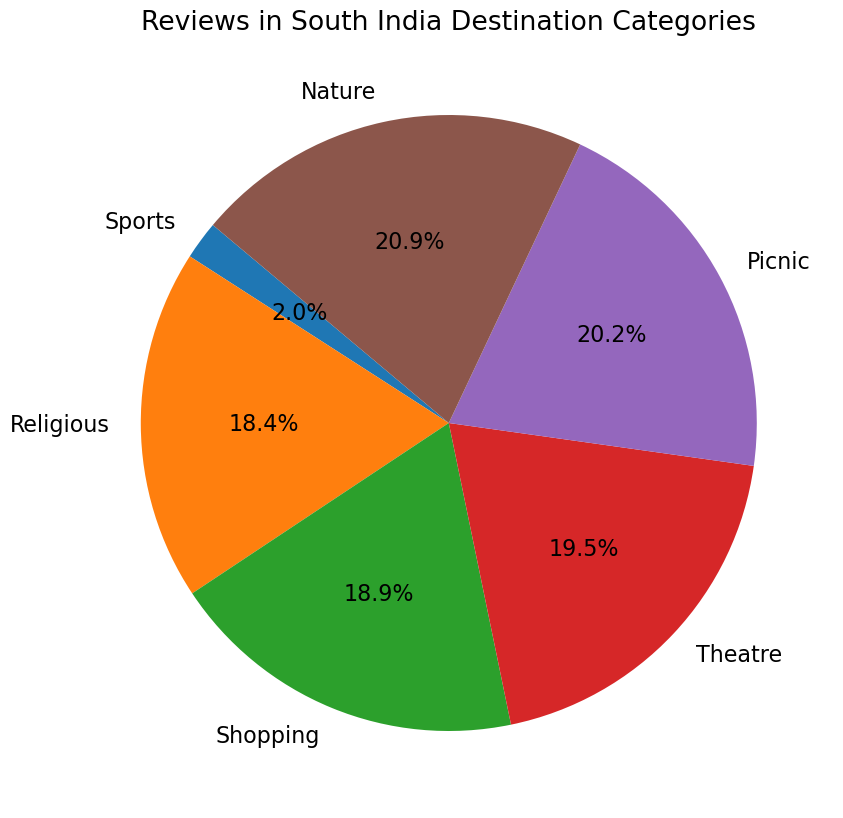

In [12]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 16})
plt.pie(column_sum, labels=column_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Reviews in South India Destination Categories')
plt.show()

In [13]:
# Comparing the categories, it is evident that the highest number of reviews (31005) in South India prefer
# to go to places with nature, while the least number of reviews (2985) prefer places with sports. There is 
# also a visible pattern in the categories. Travellers prefer outdoor activities the most (Picnic + Nature), then
# entertainment/recreational activities like (Theatre + Shopping + Religious), and lastly physical activity (Sports).

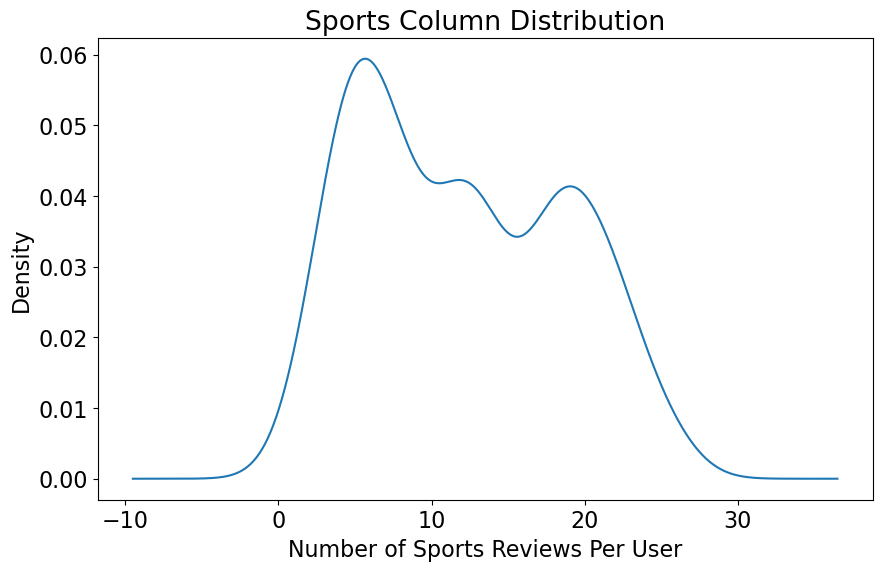

In [14]:
# Explore Sports column
plt.figure(figsize=(10, 6))
cleanData['Sports'].plot(kind='density')
plt.title('Sports Column Distribution')
plt.xlabel('Number of Sports Reviews Per User')
plt.show()

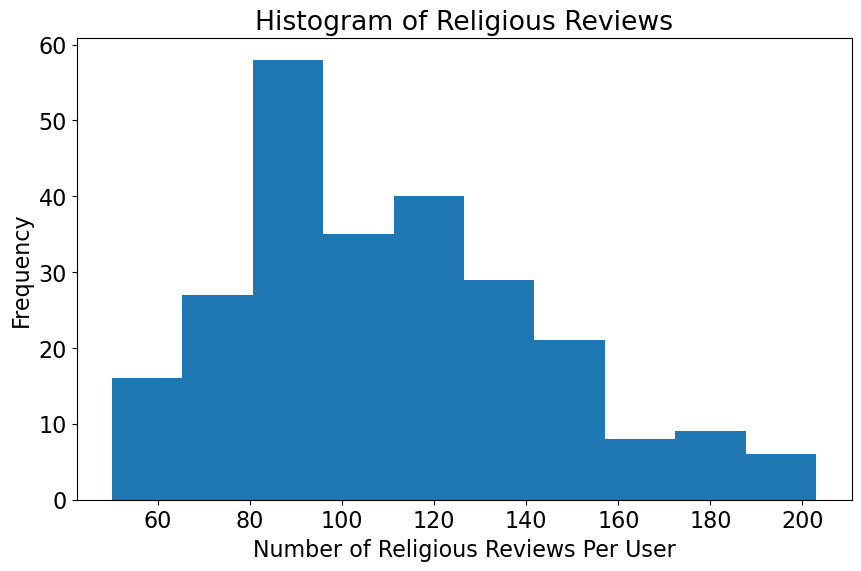

In [15]:
# Explore Religious column
plt.figure(figsize=(10, 6))
cleanData['Religious'].plot(kind='hist', bins=10)
plt.title('Histogram of Religious Reviews')
plt.xlabel('Number of Religious Reviews Per User')
plt.ylabel('Frequency')
plt.show()

# column = cleanData['Religious']
# # Calculate the histogram bin counts and bin edges
# counts, bin_edges = np.histogram(column, bins=10)

# # Print the counts and bin edges
# print("Bin counts and edges:")
# for i in range(len(counts)):
#     print(f'Bin {i+1}: {counts[i]} (range: {bin_edges[i]} - {bin_edges[i+1]})')

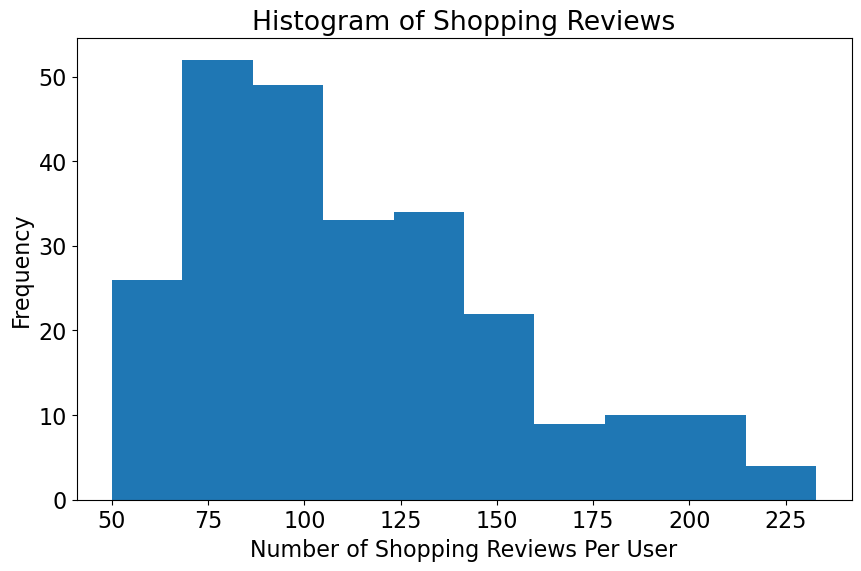

In [16]:
# Explore Shopping column
plt.figure(figsize=(10, 6))
cleanData['Shopping'].plot(kind='hist', bins=10)
plt.title('Histogram of Shopping Reviews')
plt.xlabel('Number of Shopping Reviews Per User')
plt.ylabel('Frequency')
plt.show()

# column = cleanData['Shopping']
# # Calculate the histogram bin counts and bin edges
# counts, bin_edges = np.histogram(column, bins=10)

# # Print the counts and bin edges
# print("Bin counts and edges:")
# for i in range(len(counts)):
#     print(f'Bin {i+1}: {counts[i]} (range: {bin_edges[i]} - {bin_edges[i+1]})')

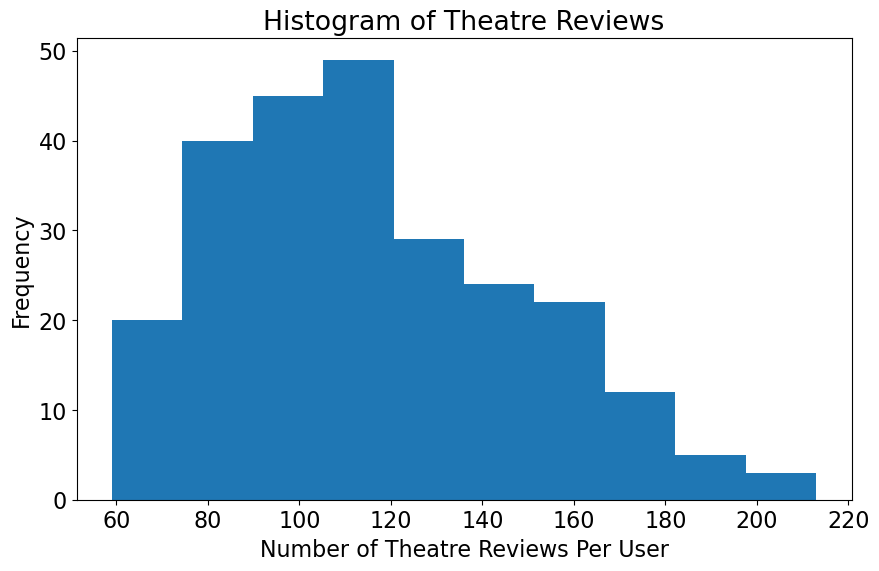

In [17]:
# Explore Theatre column
plt.figure(figsize=(10, 6))
cleanData['Theatre'].plot(kind='hist', bins=10)
plt.title('Histogram of Theatre Reviews')
plt.xlabel('Number of Theatre Reviews Per User')
plt.ylabel('Frequency')
plt.show()

# column = cleanData['Theatre']
# # Calculate the histogram bin counts and bin edges
# counts, bin_edges = np.histogram(column, bins=10)

# # Print the counts and bin edges
# print("Bin counts and edges:")
# for i in range(len(counts)):
#     print(f'Bin {i+1}: {counts[i]} (range: {bin_edges[i]} - {bin_edges[i+1]})')

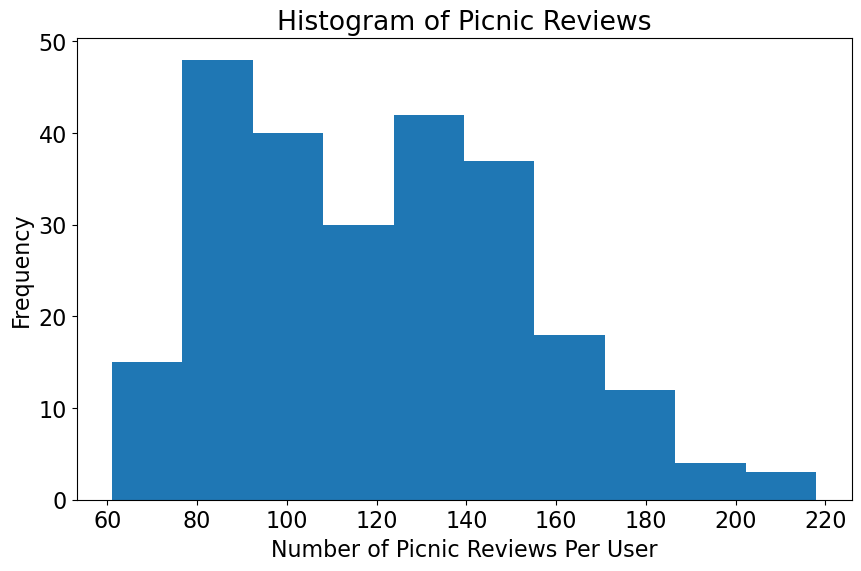

In [18]:
# Explore Picnic column
plt.figure(figsize=(10, 6))
cleanData['Picnic'].plot(kind='hist', bins=10)
plt.title('Histogram of Picnic Reviews')
plt.xlabel('Number of Picnic Reviews Per User')
plt.ylabel('Frequency')
plt.show()

# column = cleanData['Picnic']
# # Calculate the histogram bin counts and bin edges
# counts, bin_edges = np.histogram(column, bins=10)

# # Print the counts and bin edges
# print("Bin counts and edges:")
# for i in range(len(counts)):
#     print(f'Bin {i+1}: {counts[i]} (range: {bin_edges[i]} - {bin_edges[i+1]})')

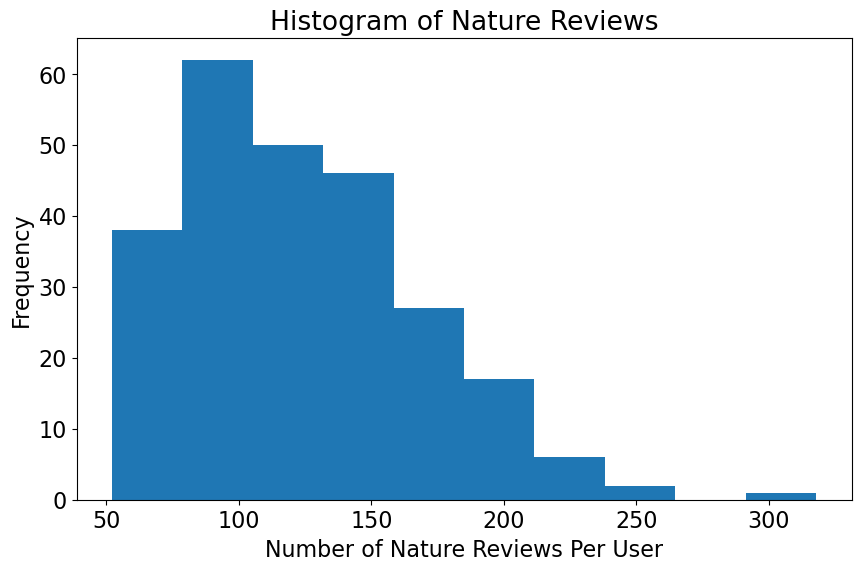

In [19]:
# Explore Nature column
plt.figure(figsize=(10, 6))
cleanData['Nature'].plot(kind='hist', bins=10)
plt.title('Histogram of Nature Reviews')
plt.xlabel('Number of Nature Reviews Per User')
plt.ylabel('Frequency')
plt.show()

# column = cleanData['Nature']
# # Calculate the histogram bin counts and bin edges
# counts, bin_edges = np.histogram(column, bins=10)

# # Print the counts and bin edges
# print("Bin counts and edges:")
# for i in range(len(counts)):
#     print(f'Bin {i+1}: {counts[i]} (range: {bin_edges[i]} - {bin_edges[i+1]})')

In [20]:
# Explore the relationship between all pairs of attributes (or at least 10 pairs of attributes, if there are 
# more in the data), and show the relationship in an appropriate graphs.

# In total there are 15 pair relationships from the columns. They are the following:
# Sports - Religious x 
# Sports - Nature
# Sports - Theatre
# Sports - Shopping
# Sports - Picnic
# Religious - Nature
# Religious - Theatre x
# Religious - Shopping x
# Religious - Picnic
# Nature - Theatre
# Nature - Shopping x
# Nature - Picnic
# Theatre - Shopping
# Theatre - Picnic
# Shopping - Picnic x 

# Pairs marked with an 'x' are chosen to be ignored for this analysis.

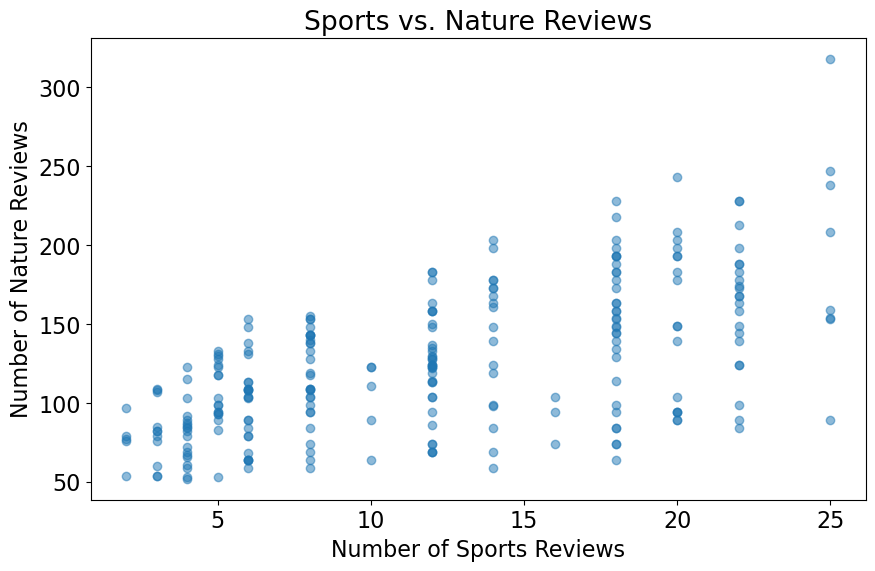

In [21]:
# 1. Sports - Nature Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Sports'], cleanData['Nature'], alpha=0.5)
plt.title('Sports vs. Nature Reviews')
plt.xlabel('Number of Sports Reviews')
plt.ylabel('Number of Nature Reviews')
plt.show()

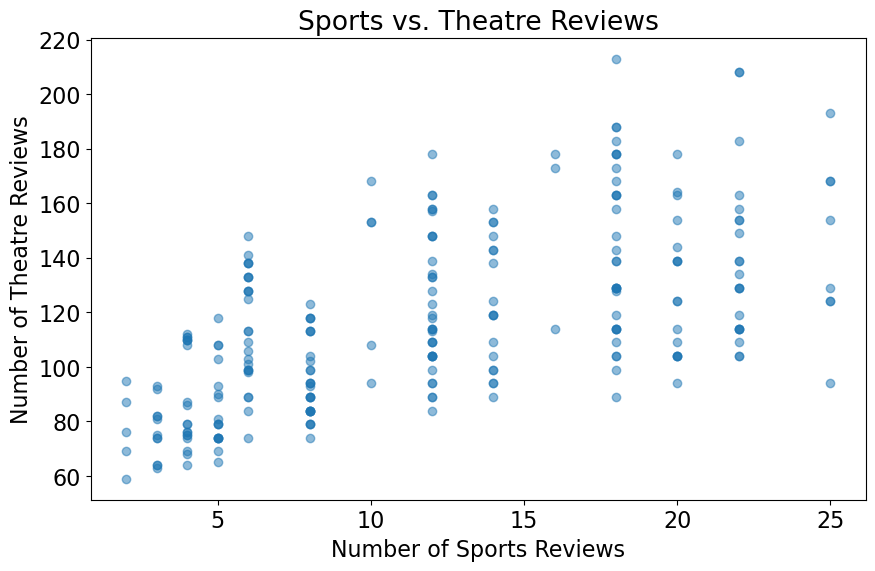

In [22]:
# 2. Sports - Theatre Analysis

# Hypothesis: 

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Sports'], cleanData['Theatre'], alpha=0.5)
plt.title('Sports vs. Theatre Reviews')
plt.xlabel('Number of Sports Reviews')
plt.ylabel('Number of Theatre Reviews')
plt.show()

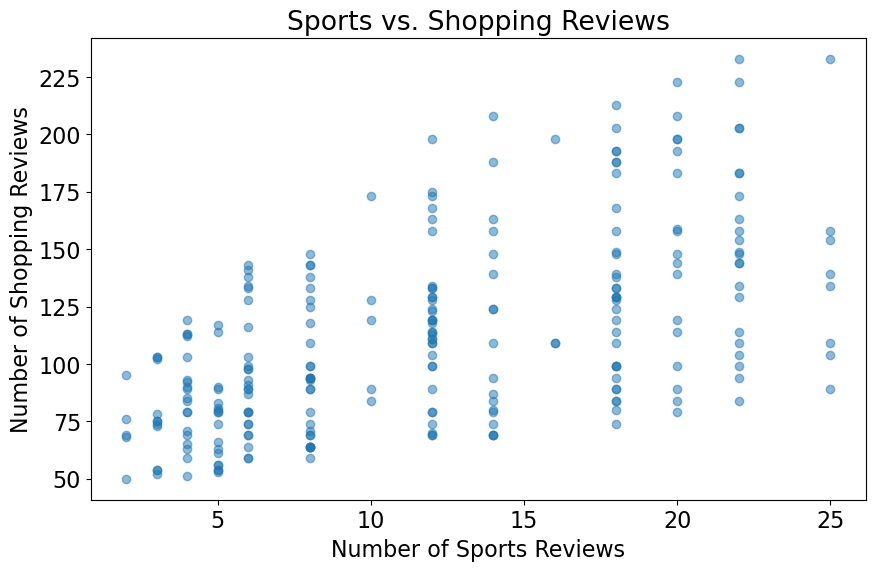

In [23]:
# 3. Sports - Shopping Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Sports'], cleanData['Shopping'], alpha=0.5)
plt.title('Sports vs. Shopping Reviews')
plt.xlabel('Number of Sports Reviews')
plt.ylabel('Number of Shopping Reviews')
plt.show()

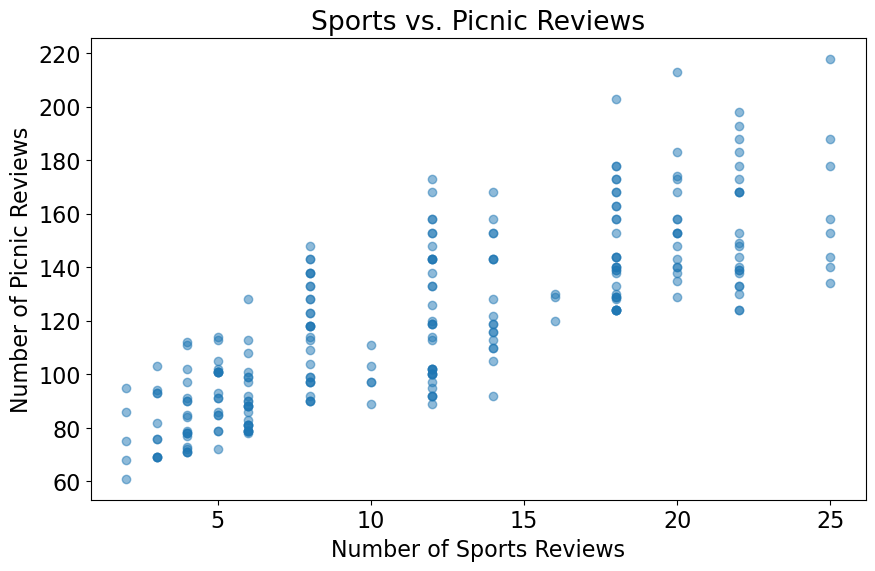

In [24]:
# 4. Sports - Picnic Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Sports'], cleanData['Picnic'], alpha=0.5)
plt.title('Sports vs. Picnic Reviews')
plt.xlabel('Number of Sports Reviews')
plt.ylabel('Number of Picnic Reviews')
plt.show()

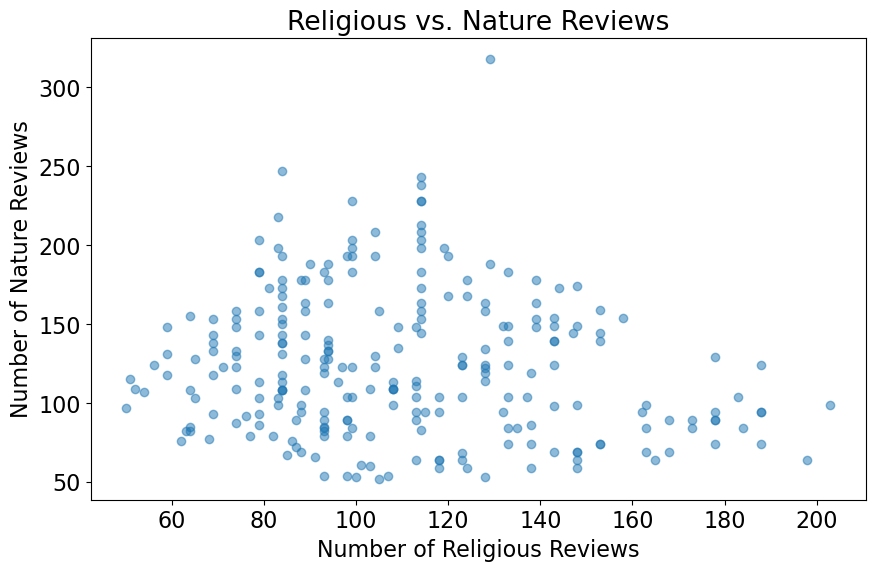

In [25]:
# 5. Religious - Nature Analysis

# Hypothesis: 

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Religious'], cleanData['Nature'], alpha=0.5)
plt.title('Religious vs. Nature Reviews')
plt.xlabel('Number of Religious Reviews')
plt.ylabel('Number of Nature Reviews')
plt.show()

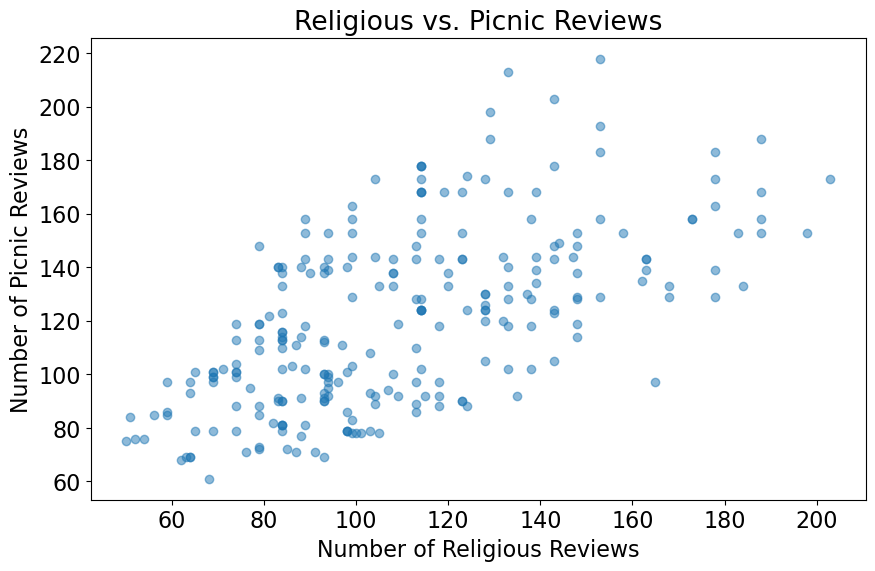

In [26]:
# 6. Religious - Picnic Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Religious'], cleanData['Picnic'], alpha=0.5)
plt.title('Religious vs. Picnic Reviews')
plt.xlabel('Number of Religious Reviews')
plt.ylabel('Number of Picnic Reviews')
plt.show()

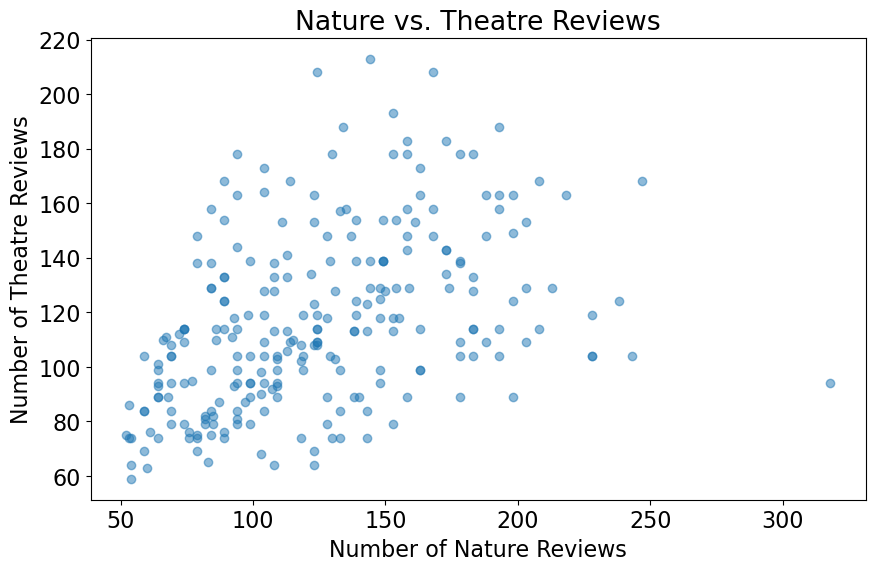

In [27]:
# 7. Nature - Theatre Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Nature'], cleanData['Theatre'], alpha=0.5)
plt.title('Nature vs. Theatre Reviews')
plt.xlabel('Number of Nature Reviews')
plt.ylabel('Number of Theatre Reviews')
plt.show()

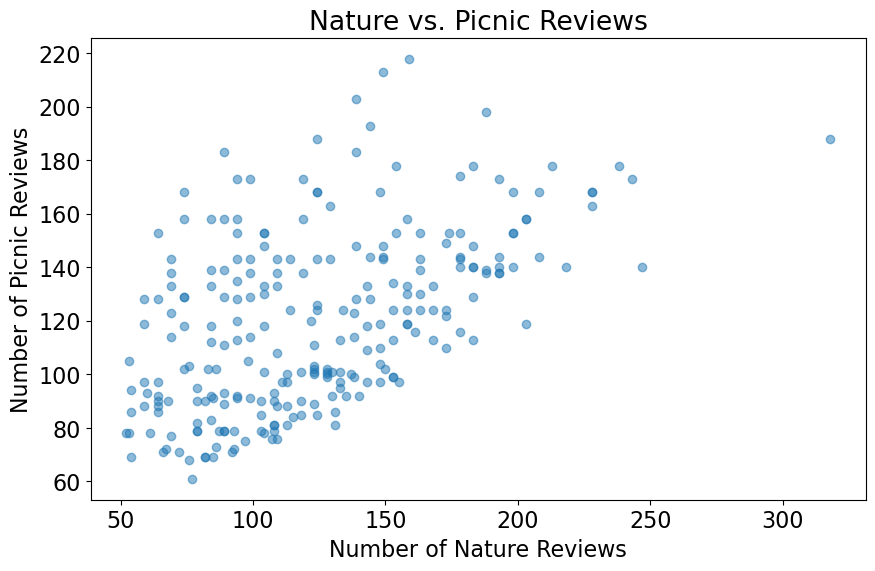

In [28]:
# 8. Nature - Picnic Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Nature'], cleanData['Picnic'], alpha=0.5)
plt.title('Nature vs. Picnic Reviews')
plt.xlabel('Number of Nature Reviews')
plt.ylabel('Number of Picnic Reviews')
plt.show()

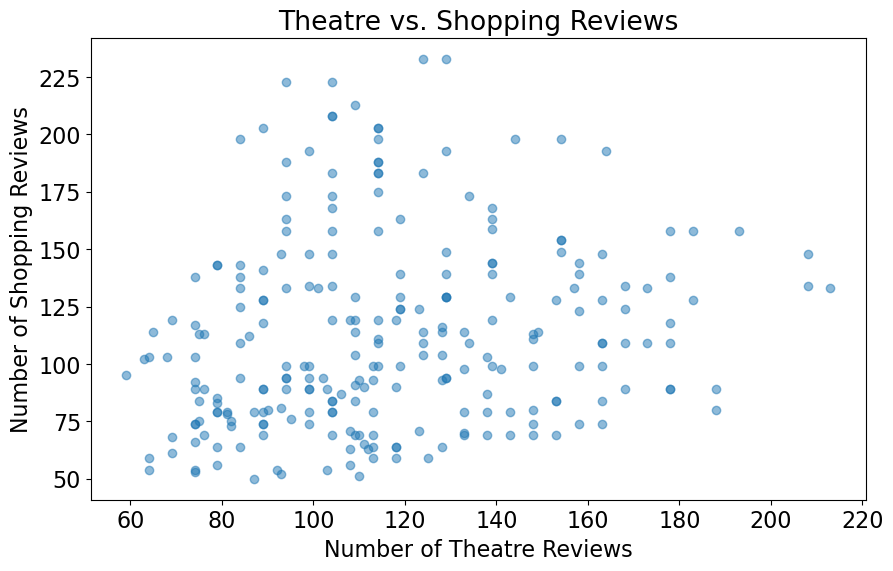

In [29]:
# 9. Theatre - Shopping Analysis

# Hypothesis: 

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Theatre'], cleanData['Shopping'], alpha=0.5)
plt.title('Theatre vs. Shopping Reviews')
plt.xlabel('Number of Theatre Reviews')
plt.ylabel('Number of Shopping Reviews')
plt.show()

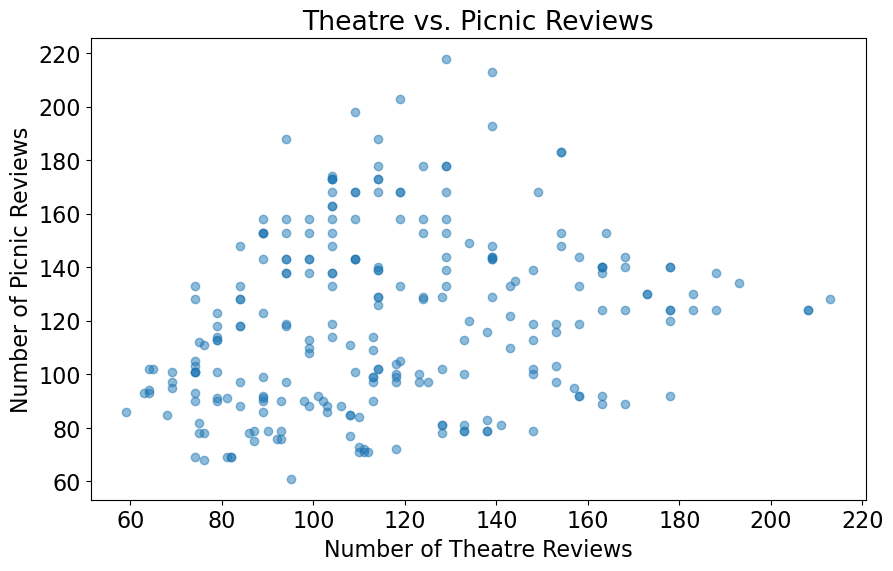

In [30]:
# 10. Theatre - Picnic Analysis

plt.figure(figsize=(10, 6))
plt.scatter(cleanData['Theatre'], cleanData['Picnic'], alpha=0.5)
plt.title('Theatre vs. Picnic Reviews')
plt.xlabel('Number of Theatre Reviews')
plt.ylabel('Number of Picnic Reviews')
plt.show()

# Task 3: Data Modelling

In [31]:
# Making the sports column the target class for our classification problem

# Finding min, max and median of the sports column
print(cleanData['Sports'].min())
print(cleanData['Sports'].median())
print(cleanData['Sports'].max())

# Converting the sports column into binary data with values HIGH and LOW for interest levels
# 0 = LOW and 1 = HIGH 
cleanData['Sports'] = cleanData['Sports'].apply(lambda x: 0 if x < 12 else 1)
cleanData.head()

2
12.0
25


,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,0,77,79,69,68,95
1,0,62,76,76,69,68
2,0,50,97,87,50,75
3,0,68,77,95,76,61
4,0,98,54,59,95,86


In [32]:
# Creating attribute and class data
# classData = cleanData.iloc[:, 0:1]
classData = cleanData['Sports']
attributeData = cleanData.iloc[:, 1:]

In [33]:
classData.head()

0    0
1    0
2    0
3    0
4    0
Name: Sports, dtype: int64

In [34]:
attributeData.head()

,Religious,Nature,Theatre,Shopping,Picnic
0,77,79,69,68,95
1,62,76,76,69,68
2,50,97,87,50,75
3,68,77,95,76,61
4,98,54,59,95,86


In [35]:
# Creating dictionary to hold classifier accuracy results
clf_dict = {"Classifier": [],"Accuracy": []}

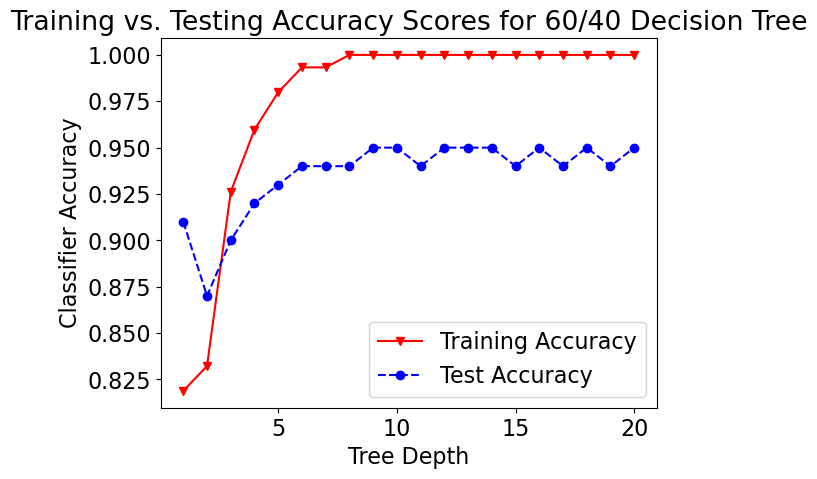

Decision Tree Classifier Accuracy: 94.0%

Confusion Matrix:
[[40  5]
 [ 1 54]]

Classification Error Rate:
0.06

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        45
           1       0.92      0.98      0.95        55

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [36]:
#--------------------------------------------
# DECISION TREE CLASSIFIER WITH 60/40 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.4, stratify=classData, random_state=1)

# Testing the fit of different decision tree depths 
training_scores = []
test_scores = []
scores = []
depths = []

for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf = clf.fit(dataTrain, classTrain)
    trainAccuracy = accuracy_score(classTrain, clf.predict(dataTrain))
    testAccuracy = accuracy_score(classTest, clf.predict(dataTest))
    training_scores.append(trainAccuracy)
    test_scores.append(testAccuracy)
    depths.append(i)
    
    
# Plotting of training and test accuracies vs the tree depths  
plt.plot(depths, training_scores,'rv-', depths,test_scores,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 60/40 Decision Tree')
plt.show()

# The model will start to overfit if the max depth is greater than 5. 
# The max depth will therefore be chosen to be 5.

# Creating decision tree classifier with max depth 5.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

# Train the classifier
clf = clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
predC = clf.predict(dataTest)
tree_accuracy = accuracy_score(classTest, predC)
print(f"Decision Tree Classifier Accuracy: {tree_accuracy*100}%")

clf_dict["Classifier"].append("Tree 60/40") 
clf_dict["Accuracy"].append(tree_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, predC))

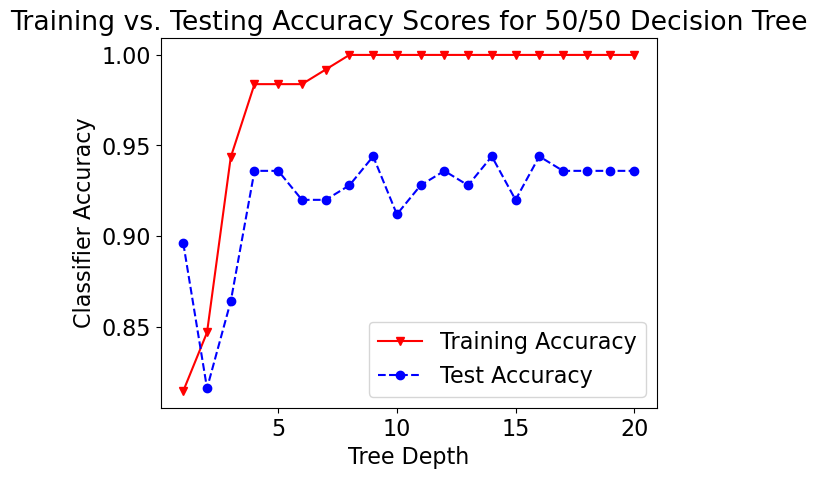

Decision Tree Classifier Accuracy: 94.39999999999999%

Confusion Matrix:
[[52  5]
 [ 2 66]]

Classification Error Rate:
0.056

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        57
           1       0.93      0.97      0.95        68

    accuracy                           0.94       125
   macro avg       0.95      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



In [37]:
#--------------------------------------------
# DECISION TREE CLASSIFIER WITH 50/50 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.5, stratify=classData, random_state=1)

# Testing the fit of different decision tree depths 
training_scores = []
test_scores = []
scores = []
depths = []

for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf = clf.fit(dataTrain, classTrain)
    trainAccuracy = accuracy_score(classTrain, clf.predict(dataTrain))
    testAccuracy = accuracy_score(classTest, clf.predict(dataTest))
    training_scores.append(trainAccuracy)
    test_scores.append(testAccuracy)
    depths.append(i)
    
    
# Plotting of training and test accuracies vs the tree depths  
plt.plot(depths, training_scores,'rv-', depths,test_scores,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 50/50 Decision Tree')
plt.show()

# The model will start to overfit if the max depth is greater than 4. 
# The max depth will therefore be chosen to be 4.

# Creating decision tree classifier with max depth 4.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

# Train the classifier
clf = clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
predC = clf.predict(dataTest)
tree_accuracy = accuracy_score(classTest, predC)
print(f"Decision Tree Classifier Accuracy: {tree_accuracy*100}%")

clf_dict["Classifier"].append("Tree 50/50") 
clf_dict["Accuracy"].append(tree_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, predC))

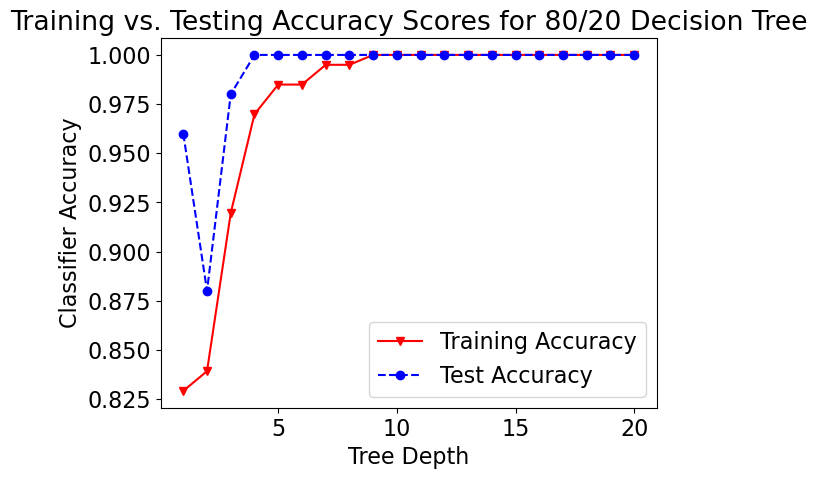

Decision Tree Classifier Accuracy: 100.0%

Confusion Matrix:
[[23  0]
 [ 0 27]]

Classification Error Rate:
0.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        27

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [38]:
#--------------------------------------------
# DECISION TREE CLASSIFIER WITH 80/20 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.2, stratify=classData, random_state=1)

# Testing the fit of different decision tree depths 
training_scores = []
test_scores = []
scores = []
depths = []

for i in range(1, 21):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf = clf.fit(dataTrain, classTrain)
    trainAccuracy = accuracy_score(classTrain, clf.predict(dataTrain))
    testAccuracy = accuracy_score(classTest, clf.predict(dataTest))
    training_scores.append(trainAccuracy)
    test_scores.append(testAccuracy)
    depths.append(i)
     
# Plotting of training and test accuracies vs the tree depths  
plt.plot(depths, training_scores,'rv-', depths,test_scores,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 80/20 Decision Tree')
plt.show()

# The model will start to overfit if the max depth is greater than 4. 
# The max depth will therefore be chosen to be 4.

# Creating decision tree classifier with max depth 4.
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4)

# Train the classifier
clf = clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
predC = clf.predict(dataTest)
tree_accuracy = accuracy_score(classTest, predC)
print(f"Decision Tree Classifier Accuracy: {tree_accuracy*100}%")

clf_dict["Classifier"].append("Tree 80/20") 
clf_dict["Accuracy"].append(tree_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, predC))

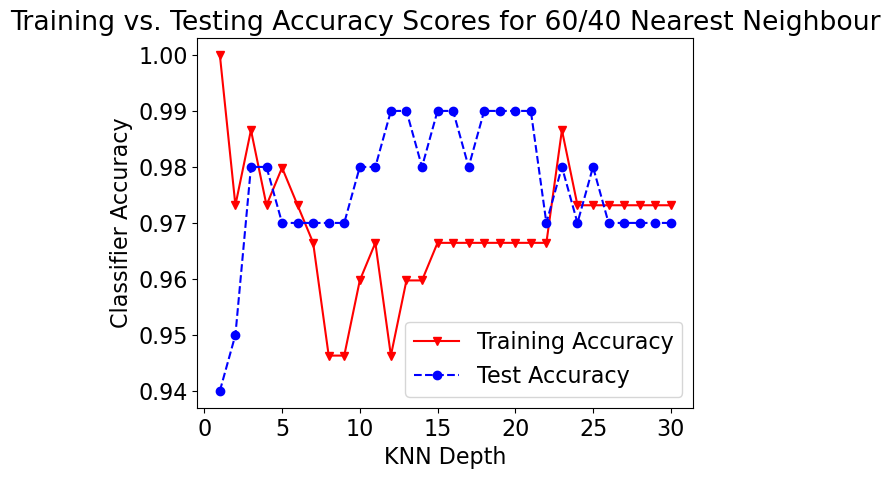

KNN Accuracy: 98.0%

Confusion Matrix:
[[43  2]
 [ 0 55]]

Classification Error Rate:
0.02

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [39]:
#--------------------------------------------
# Nearest Neighbor Classifier WITH 60/40 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.4, stratify=classData, random_state=1)

# Find best depth for the classifier
knn_depth = []
training_accuracy = []
test_accuracy = []
for i in range(1, 31):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(dataTrain, classTrain)
    test_score = accuracy_score(classTest, knn_clf.predict(dataTest))
    train_score = accuracy_score(classTrain, knn_clf.predict(dataTrain))
    knn_depth.append(i) 
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)

plt.plot(knn_depth,training_accuracy,'rv-',knn_depth,test_accuracy,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('KNN Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 60/40 Nearest Neighbour')
plt.show()

# The model will start to underfit if the number of neighbors is greater than than 3. 
# The max depth will therefore be chosen to be 3.

# Creating nearest neighbor classifier with 3 neighbors .
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
knn_predC = knn_clf.predict(dataTest)
knn_accuracy = accuracy_score(classTest, knn_clf.predict(dataTest))
print(f"KNN Accuracy: {knn_accuracy*100}%")

clf_dict["Classifier"].append("KNN 60/40") 
clf_dict["Accuracy"].append(knn_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, knn_predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, knn_predC))

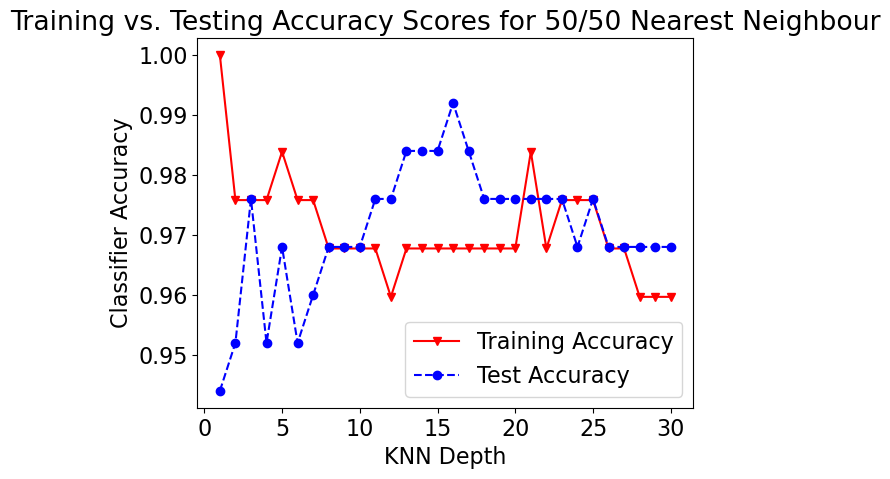

KNN Accuracy: 97.6%

Confusion Matrix:
[[55  2]
 [ 1 67]]

Classification Error Rate:
0.024

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        57
           1       0.97      0.99      0.98        68

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [40]:
#--------------------------------------------
# Nearest Neighbor Classifier WITH 50/50 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.5, stratify=classData, random_state=1)

# Find best depth for the classifier
knn_depth = []
training_accuracy = []
test_accuracy = []
for i in range(1, 31):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(dataTrain, classTrain)
    test_score = accuracy_score(classTest, knn_clf.predict(dataTest))
    train_score = accuracy_score(classTrain, knn_clf.predict(dataTrain))
    knn_depth.append(i) 
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)

plt.plot(knn_depth,training_accuracy,'rv-',knn_depth,test_accuracy,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('KNN Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 50/50 Nearest Neighbour')
plt.show()

# The model will start to underfit if the number of neighbors is greater than than 3. 
# The max depth will therefore be chosen to be 3.

# Creating nearest neighbor classifier with 3 neighbors .
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
knn_predC = knn_clf.predict(dataTest)
knn_accuracy = accuracy_score(classTest, knn_clf.predict(dataTest))
print(f"KNN Accuracy: {knn_accuracy*100}%")

clf_dict["Classifier"].append("KNN 50/50") 
clf_dict["Accuracy"].append(knn_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, knn_predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, knn_predC))

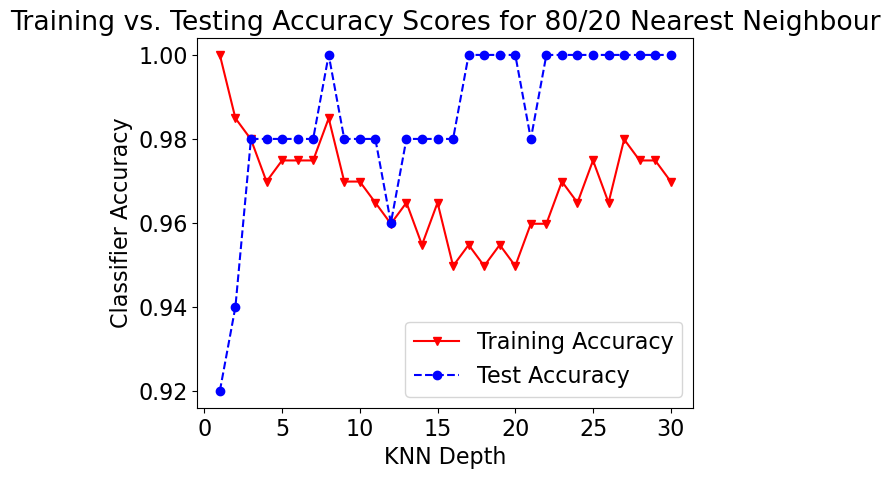

KNN Accuracy: 98.0%

Confusion Matrix:
[[22  1]
 [ 0 27]]

Classification Error Rate:
0.02

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [41]:
#--------------------------------------------
# Nearest Neighbor Classifier WITH 80/20 SPLIT
#--------------------------------------------

# Split the data for training and for testing
dataTrain, dataTest, classTrain, classTest = train_test_split(attributeData, classData, test_size=0.2, stratify=classData, random_state=1)

# Find best depth for the classifier
knn_depth = []
training_accuracy = []
test_accuracy = []
for i in range(1, 31):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(dataTrain, classTrain)
    test_score = accuracy_score(classTest, knn_clf.predict(dataTest))
    train_score = accuracy_score(classTrain, knn_clf.predict(dataTrain))
    knn_depth.append(i) 
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)

plt.plot(knn_depth,training_accuracy,'rv-',knn_depth,test_accuracy,'bo--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('KNN Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Training vs. Testing Accuracy Scores for 80/20 Nearest Neighbour')
plt.show()

# The model will start to underfit if the number of neighbors is greater than than 7. 
# The max depth will therefore be chosen to be 7.

# Creating nearest neighbor classifier with 7 neighbors .
knn_clf = KNeighborsClassifier(n_neighbors=7)

# Train the classifier
knn_clf.fit(dataTrain, classTrain)

# Printing out the accuracy score
knn_predC = knn_clf.predict(dataTest)
knn_accuracy = accuracy_score(classTest, knn_clf.predict(dataTest))
print(f"KNN Accuracy: {knn_accuracy*100}%")

clf_dict["Classifier"].append("KNN 80/20") 
clf_dict["Accuracy"].append(knn_accuracy)

# Calculate confusion matrix
confusionMatrix = confusion_matrix(classTest, knn_predC)
print("\nConfusion Matrix:")
print(confusionMatrix)

# Calculate classification error rate
classification_error_rate = (confusionMatrix[0][1] + confusionMatrix[1][0])/np.sum(confusionMatrix)
print("\nClassification Error Rate:")
print(classification_error_rate)

# Calculate precision, recall and f-1 score
print("\nClassification Report:")
print(classification_report(classTest, knn_predC))

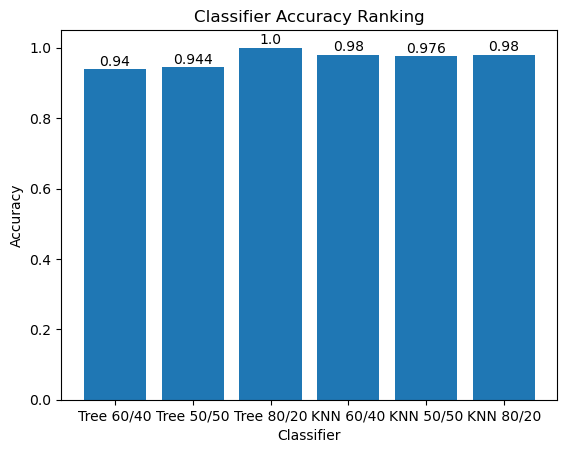

In [43]:
#--------------------------------------------
# COMPARING CLASSIFIER MODELS
#--------------------------------------------

# Creating plot of all classifiers
bars = plt.bar(x=clf_dict["Classifier"], height=clf_dict['Accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Classifier", fontsize=10)
plt.title("Classifier Accuracy Ranking")
plt.rcParams.update({'font.size': 10})
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, round(bar.get_height(), 3), horizontalalignment='center')